# Start

In [1]:
%pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib
%pip install seaborn
%pip install sklearn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install sklearn
%pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math

# Import and load spreadsheet

In [68]:
data = '230607data.csv'
# headers = data.pop(0)
df = pd.read_csv(data, header=0)

/var/folders/c7/rc1lvl2s0531qwfhxbkcbhkm0000gn/T/ipykernel_77049/602676120.py:3: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data, header=0)


In [69]:
demographic_columns = ['po _1','gender','residence','country','vegetarian','vegan']
cat_columns = ['Caring About Animals', 'Support for Institutional Welfare Solutions','Perceptions of Meat & Plant-Based Food','Perceptions of Intersecting Issues','Support for Farmed Animal Advocacy','Consumption of Animal Products (Self-Reported)']
cat_columns_reorder = ['Caring About Animals', 'Support for Institutional Welfare Solutions',
               'Knowledge about Farmed Animal Conditions', 'Consumption of Animal Products (Self-Reported)',
               'Perceptions of Meat & Plant-Based Food','Support for Farmed Animal Advocacy',
               'Perceptions of Intersecting Issues']
df = df.reindex(columns=demographic_columns+cat_columns_reorder)

In [70]:


df[cat_columns_reorder]

,Caring About Animals,Support for Institutional Welfare Solutions,Knowledge about Farmed Animal Conditions,Consumption of Animal Products (Self-Reported),Perceptions of Meat & Plant-Based Food,Support for Farmed Animal Advocacy,Perceptions of Intersecting Issues
0,-0.037037,-5.460000e-17,-0.333333,-0.225000,-0.115556,0.285714,2.500000e-01
1,0.305556,5.416667e-01,-0.777778,-0.283333,-0.111111,0.380952,1.666667e-01
2,0.398148,6.250000e-01,-0.222222,-0.075000,0.075556,0.380952,2.500000e-01
3,-0.111111,-8.333333e-02,-0.444444,1.000000,-0.044444,0.000000,0.000000e+00
4,0.277778,5.833333e-01,-0.444444,-0.015000,0.555556,0.523810,6.666667e-01
...,...,...,...,...,...,...,...
20961,0.518519,5.416667e-01,-0.333333,0.056667,-0.084444,0.047619,-3.640000e-17
20962,0.166667,1.250000e-01,-0.333333,-0.245833,-0.253333,-0.142857,-3.333333e-01
20963,0.111111,4.166667e-01,-0.555556,-0.128333,0.328889,0.714286,1.666667e-01
20964,0.509259,5.833333e-01,-0.444444,-0.180000,0.093333,0.714286,8.333333e-02


In [71]:
for col in cat_columns_reorder:
  df[col] = pd.to_numeric(df[col])

# for col in demographic_columns:
  # df[col] = pd.to_numeric(df[col])


# Summary

In [9]:
# Data Exploration
print(df.head())
print(df.info())
print(df.describe())

   po _1  gender  residence    country  vegetarian  vegan   
0      5       2          1      Spain           0      0  \
1      4       1          2      Spain           0      0   
2      2       2          1      Italy           0      0   
3      4       2          2  Singapore           1      1   
4      3       1          1      Spain           0      0   

   Caring About Animals  Support for Institutional Welfare Solutions   
0             -0.037037                                -5.460000e-17  \
1              0.305556                                 5.416667e-01   
2              0.398148                                 6.250000e-01   
3             -0.111111                                -8.333333e-02   
4              0.277778                                 5.833333e-01   

   Knowledge about Farmed Animal Conditions   
0                                 -0.333333  \
1                                 -0.777778   
2                                 -0.222222   
3           

# k means Cat columns

## Cluster

In [11]:
# def k_cluster(n):

# Select the columns you want to cluster and convert to numeric
columns_to_cluster = cat_columns_reorder
df[columns_to_cluster] = df[columns_to_cluster].apply(pd.to_numeric)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df[columns_to_cluster])

# Add the cluster labels to the dataframe
df['cluster'] = clusters
print(df)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       po _1  gender  residence    country  vegetarian  vegan   
0          5       2          1      Spain           0      0  \
1          4       1          2      Spain           0      0   
2          2       2          1      Italy           0      0   
3          4       2          2  Singapore           1      1   
4          3       1          1      Spain           0      0   
...      ...     ...        ...        ...         ...    ...   
20961      4       2          2    Germany           0      0   
20962      5       2          1      Chile           0      0   
20963      1       2          1      China           0      0   
20964      3       1          1      China           0      0   
20965      5       2          1      China           0      0   

       Caring About Animals  Support for Institutional Welfare Solutions   
0                 -0.037037                                -5.460000e-17  \
1                  0.305556                                 5.41666

In [12]:
means = df.groupby('cluster')[columns_to_cluster].mean()
stds = df.groupby('cluster')[columns_to_cluster].std()

# DBSCAN

In [76]:
from sklearn.mixture import GaussianMixture

# Assuming you have your data stored in the 'data' variable
data = df[cat_columns_reorder]
# Create the GMM object
gmm = GaussianMixture(n_components=3)  # Specify the number of components/clusters

# Fit the GMM model to the data
gmm.fit(data)

# Obtain the cluster labels assigned by GMM
labels = gmm.predict(data)

# Print the results
print(labels)
df['cluster'] = labels


[0 0 0 ... 0 0 2]


In [14]:
# from sklearn.cluster import AgglomerativeClustering

# # Assuming you have your data stored in the 'data' variable
# data = df[cat_columns_reorder]

# # Perform data scaling if necessary
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)

# # Create the AgglomerativeClustering object
# agglomerative = AgglomerativeClustering(n_clusters=6)  # Specify the number of clusters

# # Fit the AgglomerativeClustering model to the scaled data
# agglomerative.fit(scaled_data)

# # Obtain the cluster labels assigned by AgglomerativeClustering
# labels = agglomerative.labels_

# # Print the results
# print(labels)
# df['agglomcluster3'] = labels

In [15]:
df['cluster'] = labels

In [16]:
# import scipy.cluster.hierarchy as sch
# import matplotlib.pyplot as plt

# # Assuming you have your data stored in the 'data' variable
# data = df[cat_columns_reorder]

# # Compute the linkage matrix
# linkage_matrix = sch.linkage(data, method='ward')

# # Plot the dendrogram
# plt.figure(figsize=(10, 7))
# dendrogram = sch.dendrogram(linkage_matrix)
# plt.xlabel('Data Points')
# plt.ylabel('Distance')
# plt.title('Dendrogram')
# plt.show()

In [17]:
df

,po _1,gender,residence,country,vegetarian,vegan,Caring About Animals,Support for Institutional Welfare Solutions,Knowledge about Farmed Animal Conditions,Consumption of Animal Products (Self-Reported),Perceptions of Meat & Plant-Based Food,Support for Farmed Animal Advocacy,Perceptions of Intersecting Issues,cluster
0,5,2,1,Spain,0,0,-0.037037,-5.460000e-17,-0.333333,-0.225000,-0.115556,0.285714,2.500000e-01,3
1,4,1,2,Spain,0,0,0.305556,5.416667e-01,-0.777778,-0.283333,-0.111111,0.380952,1.666667e-01,3
2,2,2,1,Italy,0,0,0.398148,6.250000e-01,-0.222222,-0.075000,0.075556,0.380952,2.500000e-01,0
3,4,2,2,Singapore,1,1,-0.111111,-8.333333e-02,-0.444444,1.000000,-0.044444,0.000000,0.000000e+00,1
4,3,1,1,Spain,0,0,0.277778,5.833333e-01,-0.444444,-0.015000,0.555556,0.523810,6.666667e-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20961,4,2,2,Germany,0,0,0.518519,5.416667e-01,-0.333333,0.056667,-0.084444,0.047619,-3.640000e-17,0
20962,5,2,1,Chile,0,0,0.166667,1.250000e-01,-0.333333,-0.245833,-0.253333,-0.142857,-3.333333e-01,3
20963,1,2,1,China,0,0,0.111111,4.166667e-01,-0.555556,-0.128333,0.328889,0.714286,1.666667e-01,3
20964,3,1,1,China,0,0,0.509259,5.833333e-01,-0.444444,-0.180000,0.093333,0.714286,8.333333e-02,0


# Demographics

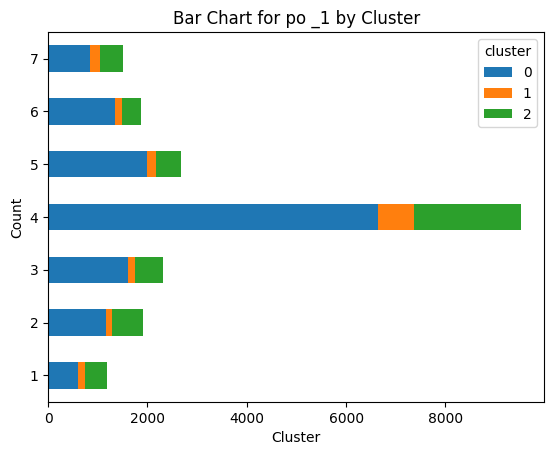

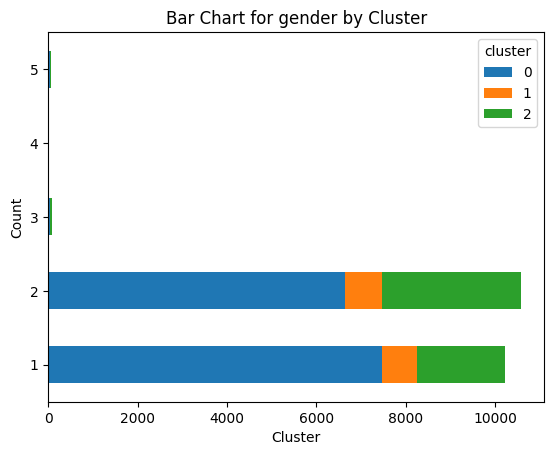

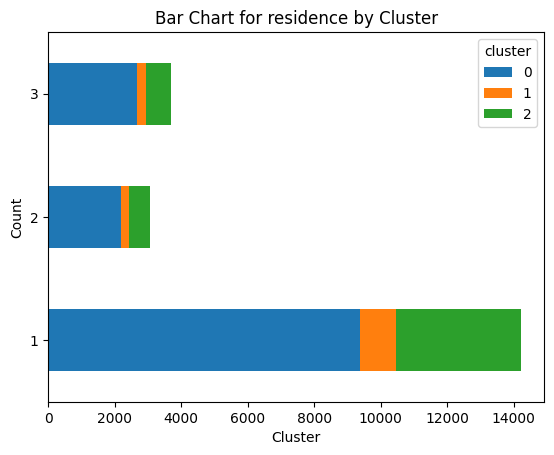

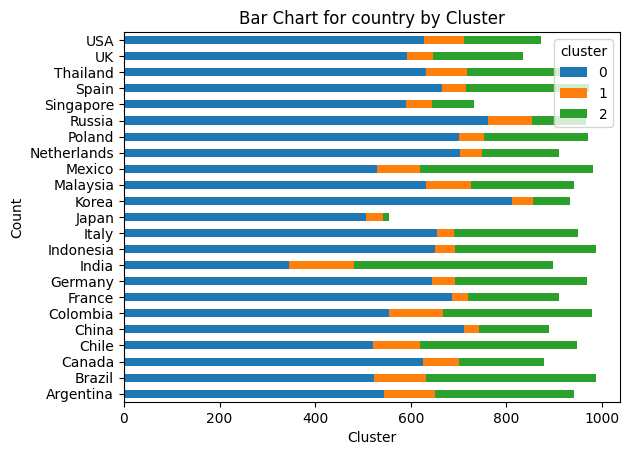

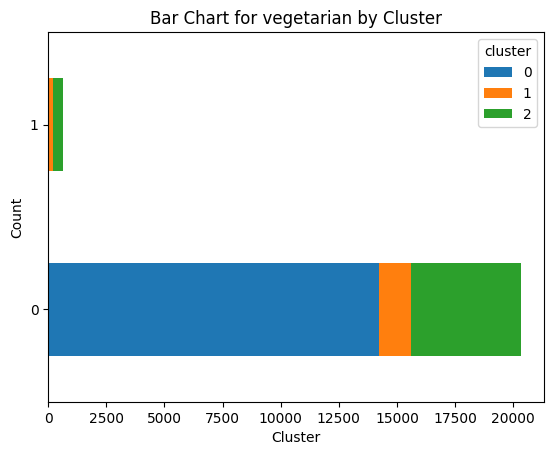

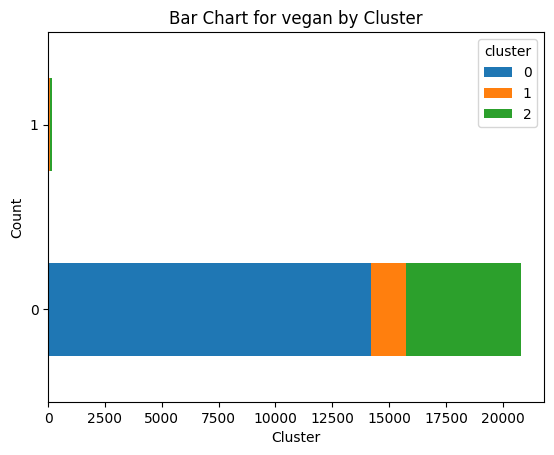

In [77]:
columns_to_plot=demographic_columns

for column in columns_to_plot:
    # Group the dataframe by the 'cluster' column and the current column
    grouped = df.groupby([column, 'cluster']).size().unstack()
    
    # # Normalize so all bars are the same total length
    # grouped = grouped.div(grouped.sum(axis=1), axis=0)



    # Plot the grouped data as a bar chart
    grouped.plot(kind='barh', stacked=True)
    
    # Set the title and labels
    plt.title(f'Bar Chart for {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    
    # Display the plot
    plt.show()

In [19]:
print(means)
print(stds)

         Caring About Animals  Support for Institutional Welfare Solutions   
cluster                                                                      
0                   -0.010995                                     0.323041  \
1                    0.087367                                     0.425570   
2                    0.365296                                     0.763504   

         Knowledge about Farmed Animal Conditions   
cluster                                             
0                                       -0.308193  \
1                                       -0.368557   
2                                       -0.229965   

         Consumption of Animal Products (Self-Reported)   
cluster                                                   
0                                             -0.158633  \
1                                             -0.125503   
2                                             -0.072052   

         Perceptions of Meat & Plant-Based Food



```
`# This is formatted as code`
```

# Sane graph

['Caring About Animals', 'Support for Institutional Welfare Solutions', 'Knowledge about Farmed Animal Conditions', 'Consumption of Animal Products (Self-Reported)', 'Perceptions of Meat & Plant-Based Food', 'Support for Farmed Animal Advocacy', 'Perceptions of Intersecting Issues']


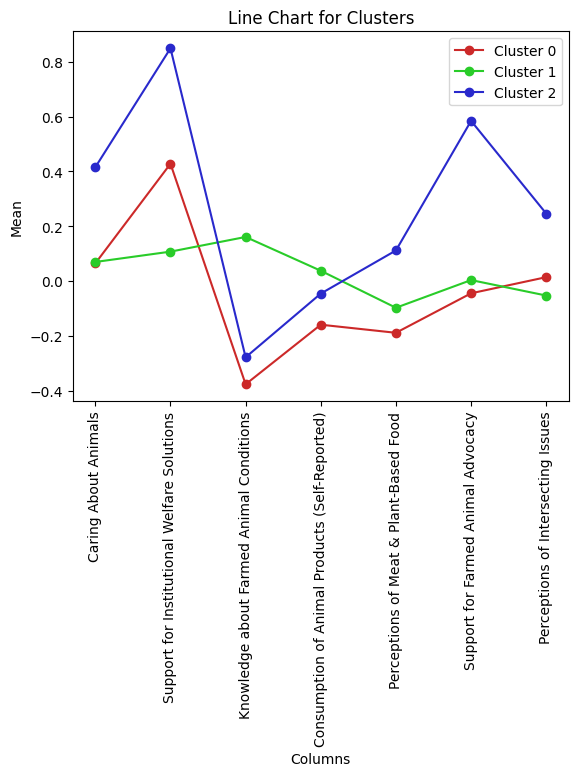

In [78]:

# Define the columns to plot
columns_to_plot = cat_columns_reorder
print(columns_to_plot)

# Create the line chart
fig, ax = plt.subplots()

# Loop through each cluster and create a line chart
count = 0
clusters = df['cluster'].unique()
for cluster in clusters:
    # Filter the dataframe to only include rows in the current cluster
    subset = df[df['cluster'] == cluster]
    
    # Get the means for the subset
    means = subset[columns_to_plot].mean()
    x = range(len(columns_to_plot))
    
    hue = count / len(clusters)
    count += 1
    color = colorsys.hsv_to_rgb(hue, 0.8, 0.8)
    ax.plot(x, means, marker='o', label='Cluster ' + str(cluster), color=color)
    
# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(columns_to_plot,rotation=90)

# Set the title and labels
plt.title('Line Chart for Clusters')
plt.xlabel('Columns')
plt.ylabel('Mean')

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Radar chart

In [ ]:
%pip install pygal
%pip install cairosvg

from IPython.display import display
import pygal
from pygal import Config
from pygal.style import Style
import pandas as pd



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install pillow


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [59]:
import colorsys
import pygal


In [61]:
# def radar_chart(columns_to_plot):

# Define the columns to plot
columns_to_plot = cat_columns_reorder
print(columns_to_plot)


# Create the radar chart
chart = pygal.Radar(fill=False)
chart.x_labels = columns_to_plot
chart.range = [0,2]


# Loop through each cluster and create a radar chart
count = 0
clusters = df['cluster'].unique()
for cluster in clusters:
    # Filter the dataframe to only include rows in the current cluster
    subset = df[df['cluster'] == cluster]
    
    # Get the means for the subset
    means = subset[columns_to_plot].mean()
    # q1s = subset[columns_to_plot].quantile([0.25])
    # print(means)

    hue = count / len(clusters)
    count += 1
    color = colorsys.hsv_to_rgb(hue, 0.8, 0.8)
    chart.add('Cluster ' + str(cluster), [round(mean, 2)+1 for mean in means], stroke_style={'width': 10, 'color': color})
    # chart.add('Cluster ' + str(cluster), [round(q1, 2)+1 for q1 in q1s], stroke_style={'width': 10, 'color': color})
    

chart.render_to_file('Plots/spider4/'+'clusters_kmeans_' + str(len(clusters
                                                                                       )) +'_' + str(cluster) + '.svg')


    # chart_data = chart.render_to_png()
    # display(SVG(chart.render()))
    # Convert the PNG data to a base64-encoded string
    # chart_data_base64 = base64.b64encode(chart_data).decode('utf-8')

    # Display the chart as an HTML image
    # display(HTML('<img src="data:image/png;base64,{0}">'.format(chart_data_base64)))

['Caring About Animals', 'Support for Institutional Welfare Solutions', 'Knowledge about Farmed Animal Conditions', 'Consumption of Animal Products (Self-Reported)', 'Perceptions of Meat & Plant-Based Food', 'Support for Farmed Animal Advocacy', 'Perceptions of Intersecting Issues']




```
# This is formatted as code
```

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
columns_to_cluster = cat_columns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[columns_to_cluster])

print("Explained variance ratio 2:", pca.explained_variance_ratio_)


# plt.scatter(pca_result[:,0], pca_result[:,1], c=df['cluster'], cmap='viridis')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA Plot of Clusters')
# plt.show()
n_components = 7
pca = PCA(n_components)
pca_result = pca.fit_transform(df[columns_to_cluster])

print("Explained variance ratio 3:", pca.explained_variance_ratio_)

Explained variance ratio 2: [0.5168471  0.17424508]


ValueError: n_components=7 must be between 0 and min(n_samples, n_features)=6 with svd_solver='full'

[[0.2510596  0.06122427 0.31865471 0.33432124 0.52087898 0.66706179
  0.06018968]
 [0.35823014 0.25234251 0.65948255 0.08894999 0.60269357 0.04297651
  0.00886416]
 [0.14265805 0.29502162 0.36225246 0.16152608 0.58490028 0.62423744
  0.05926792]
 [0.09605344 0.91696127 0.35316032 0.04348749 0.05604486 0.14183549
  0.00916794]
 [0.18665016 0.00308335 0.07907976 0.63907477 0.10439463 0.33017451
  0.65617725]
 [0.85871043 0.06827068 0.44640152 0.10446848 0.00914538 0.03907596
  0.21484173]
 [0.082709   0.00697989 0.0454419  0.65803126 0.09599121 0.18124499
  0.71831493]]


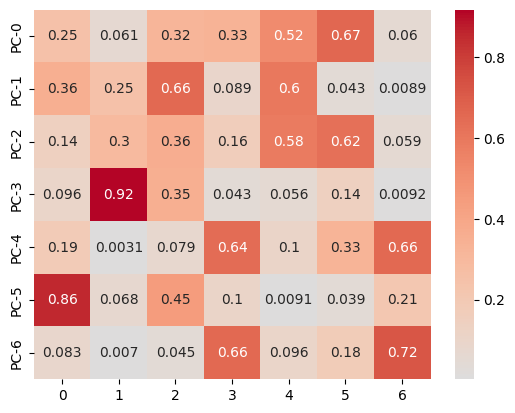

In [ ]:
loadings = []

for i in range(n_components):

  loading = pd.DataFrame(np.abs(pca.components_[i]))
  loadings.append(loading)

loadings = np.squeeze(loadings)
# Print the loadings
print(loadings)
sns.heatmap(loadings, annot=True, yticklabels=['PC-'+str(x) for x in range(7)], cmap='coolwarm', center=0)
# plt.show()
plt.savefig('/Users/siaosilooi/Library/CloudStorage/GoogleDrive-looisiaosi@gmail.com/My Drive/MFA/loadings_heatmap_PCAcomponents'+''+'.png',bbox_inches='tight',)

   cat_Caring About Animals  cat_Knowledge about Farmed Animal Conditions   
0                 -0.587940                                     -0.126706  \
0                 -0.491510                                     -0.305969   
0                 -0.180132                                     -0.329205   
0                 -0.104705                                      0.883327   
0                  0.172260                                     -0.002515   
0                  0.580434                                     -0.040781   

   cat_Support for Institutional Welfare Solutions   
0                                        -0.551598  \
0                                        -0.668835   
0                                        -0.338106   
0                                        -0.284558   
0                                        -0.053947   
0                                        -0.223037   

   cat_Perceptions of Meat & Plant-Based Food   
0                               

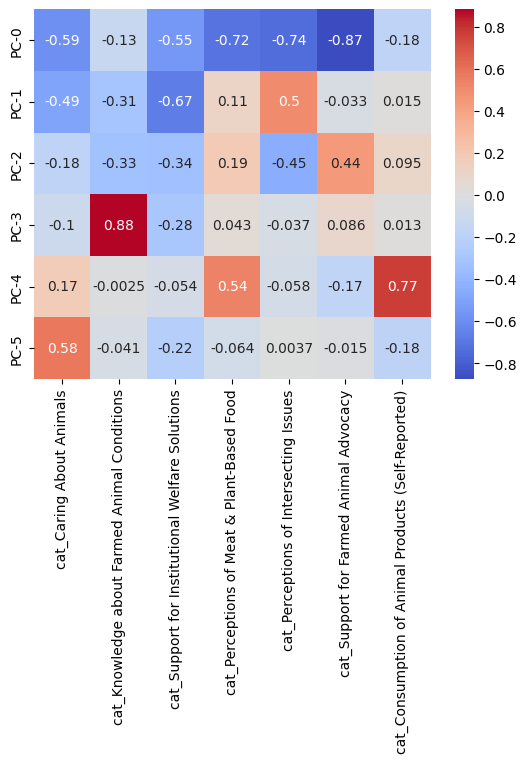

In [ ]:
# Correlation heatmap
pca_df = pd.DataFrame(pca_result)
# print(pca_df.head())
# print(pca_df.info())
# print(pca_df.describe())

dfs=[]
for i in range(6):
  corrwith = pd.DataFrame(df[cat_columns]).corrwith(pca_df[i])
  corr_df = pd.DataFrame(np.reshape(corrwith.values,(1,-1)),columns=corrwith.index)
  dfs.append(corr_df)
  
corr = pd.concat(dfs, axis=0)
print(corr)
print(corr.shape)
# corr.plot(kind='barh')
plt.figure()


sns.heatmap(corr, annot=True, yticklabels=['PC-'+str(x) for x in range(6)],cmap='coolwarm')
plt.show()
# plt.savefig('/content/drive/MyDrive/MFA/correlation_heatmap_PCAcomponents'+''+'.png',bbox_inches='tight')

In [ ]:
from kmodes.kmodes import KModes

*italicized text*# Autoencoding

# Autoencoding

In [ ]:
%pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = df[cat_columns]
# Rescale the values in the 'cat_columns' column
for i in cat_columns_reorder:
  df2[i] = scaler.fit_transform(df[[i]])

/var/folders/c7/rc1lvl2s0531qwfhxbkcbhkm0000gn/T/ipykernel_77049/1492153817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = scaler.fit_transform(df[[i]])
/var/folders/c7/rc1lvl2s0531qwfhxbkcbhkm0000gn/T/ipykernel_77049/1492153817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = scaler.fit_transform(df[[i]])
/var/folders/c7/rc1lvl2s0531qwfhxbkcbhkm0000gn/T/ipykernel_77049/1492153817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [83]:
df_cat = df2[cat_columns_reorder]

input_dim = len(df_cat.columns)
latent_dim = 1

#create encoder
encoder_inputs = keras.Input(shape=(input_dim,))
x = layers.Dense(16, activation="relu")(encoder_inputs)
x = layers.Dense(32, activation="relu")(x)
latent = layers.Dense(latent_dim, activation="relu")(x)

encoder = keras.Model(encoder_inputs, latent, name="encoder")

#create decoder
decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(16, activation="relu")(decoder_inputs)
x = layers.Dense(32, activation="relu")(x)
decoder_outputs = layers.Dense(input_dim, activation="sigmoid")(x)

decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")

#create autoencoder
autoencoder_inputs = keras.Input(shape=(input_dim,))
latent = encoder(autoencoder_inputs)
decoder_outputs = decoder(latent)
autoencoder = keras.Model(autoencoder_inputs, decoder_outputs, name="autoencoder")

# Compile the model

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train the autoencoder
autoencoder.fit(df_cat, df_cat, epochs=50, batch_size=128, validation_split=0.2)

# Generate reconstructed data from test data
reconstructed = autoencoder.predict(df_cat)

#print
np.set_printoptions(suppress=True)

print('Original data:')
print(df_cat.head())
print('Reconstructed data:')
print(pd.DataFrame(reconstructed, columns=df_cat.columns).head())

Epoch 1/50
132/132 [==============================] - 0s 1ms/step - loss: 0.6680 - val_loss: 0.6481
Epoch 2/50
132/132 [==============================] - 0s 686us/step - loss: 0.6380 - val_loss: 0.6343
Epoch 3/50
132/132 [==============================] - 0s 690us/step - loss: 0.6211 - val_loss: 0.6243
Epoch 4/50
132/132 [==============================] - 0s 685us/step - loss: 0.6156 - val_loss: 0.6228
Epoch 5/50
132/132 [==============================] - 0s 665us/step - loss: 0.6144 - val_loss: 0.6220
Epoch 6/50
132/132 [==============================] - 0s 689us/step - loss: 0.6139 - val_loss: 0.6218
Epoch 7/50
132/132 [==============================] - 0s 678us/step - loss: 0.6135 - val_loss: 0.6212
Epoch 8/50
132/132 [==============================] - 0s 696us/step - loss: 0.6133 - val_loss: 0.6213
Epoch 9/50
132/132 [==============================] - 0s 676us/step - loss: 0.6132 - val_loss: 0.6211
Epoch 10/50
132/132 [==============================] - 0s 686us/step - loss: 0.6130 

In [84]:
arr = encoder.predict(df_cat)
print(arr)
# Get the highest value
max_val = np.amax(arr)
print("Highest value:", max_val)

# Get the lowest value 

min_val = np.amin(arr)
print("Lowest value:", min_val)

656/656 [==============================] - 0s 263us/step
[[1.2193547]
 [2.1213164]
 [2.4203796]
 ...
 [2.2034311]
 [2.4783657]
 [3.195537 ]]
Highest value: 5.306548
Lowest value: 0.0


In [46]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 7)]               0         
                                                                 
 encoder (Functional)        (None, 1)                 705       
                                                                 
 decoder (Functional)        (None, 7)                 807       
                                                                 
Total params: 1512 (5.91 KB)
Trainable params: 1512 (5.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
i = 5
samples = np.array([[x/i for x in range(0,math.ceil(max_val)*i)]])
samples = samples.T
# print(samples)
decoder_data = decoder.predict(samples)
print(decoder_data)

1/1 [==============================] - 0s 29ms/step
[[0.33864647 0.28967887 0.35813594 0.45776522 0.2387501  0.03316426
  0.05060362]
 [0.4059292  0.49933144 0.35744184 0.44056207 0.22895743 0.04017841
  0.07545531]
 [0.48184395 0.71814376 0.35829243 0.42199355 0.21967478 0.04994271
  0.11318901]
 [0.5623162  0.86624765 0.36532408 0.40652242 0.22624862 0.0746127
  0.2031905 ]
 [0.5415543  0.7905981  0.34506056 0.41895348 0.31529555 0.16328016
  0.3523504 ]
 [0.4843641  0.6177732  0.31610104 0.43695354 0.40403834 0.35009974
  0.4453461 ]
 [0.4788361  0.58194464 0.30604103 0.44338778 0.4478119  0.49608007
  0.48773953]
 [0.5090969  0.66187423 0.31508192 0.44117457 0.45702937 0.5309936
  0.49795988]
 [0.53929126 0.7335196  0.32426512 0.43896368 0.46627635 0.56560624
  0.5081819 ]
 [0.5691999  0.79469305 0.3335856  0.4367552  0.47554657 0.5995908
  0.51839715]
 [0.59861207 0.8447948  0.34303796 0.43454927 0.48483366 0.6326434
  0.52859706]
 [0.62733096 0.88444793 0.35261646 0.4323459  0.49

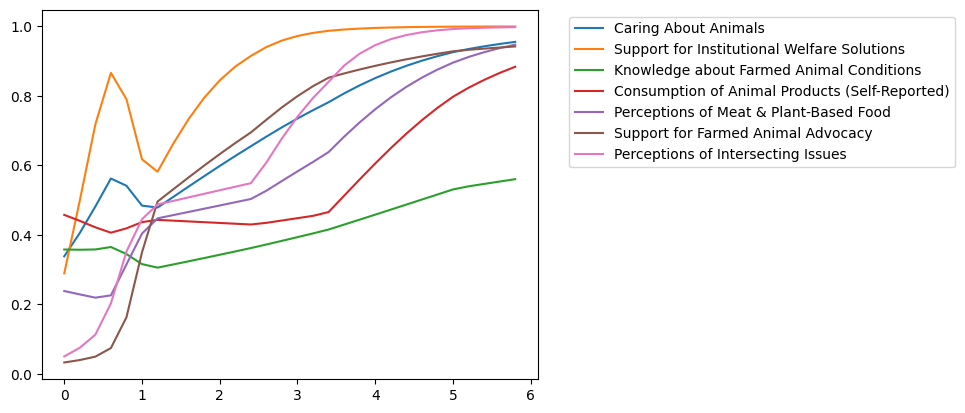

In [86]:
data_t = decoder_data.T
# print(data_t)
plt.figure()

for i in range(data_t.shape[0]):
    plt.plot(samples,data_t[i])
    

plt.legend(cat_columns_reorder,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# plt.savefig()

656/656 [==============================] - 0s 339us/step
0.91528106
1
1
1


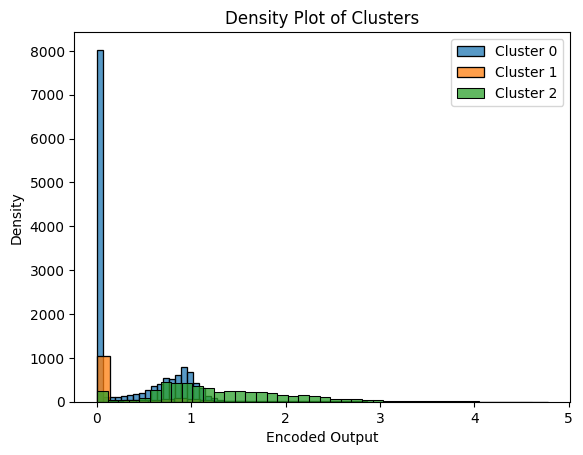

In [90]:
# Assuming your dataset is in the same order as the encoder inputs
encoder_inputs = df[cat_columns_reorder]  # Adjust this if necessary

# Get the encoded output
encoded_output = encoder.predict(encoder_inputs)
# print(encoded_output)
print(encoded_output.T[0][1])

# Add the encoded output to the DataFrame
df['encoded_output'] = encoded_output.T[0]

# Plotting
plt.figure()

# Iterate over unique clusters
clusters = df['cluster'].unique()
for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster]
    print(1)
    sns.histplot(data=cluster_data['encoded_output'], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Encoded Output')
plt.ylabel('Density')
plt.title('Density Plot of Clusters')

# Add legend
plt.legend()

# Show the plot

In [53]:
df

,po _1,gender,residence,country,vegetarian,vegan,Caring About Animals,Support for Institutional Welfare Solutions,Knowledge about Farmed Animal Conditions,Consumption of Animal Products (Self-Reported),Perceptions of Meat & Plant-Based Food,Support for Farmed Animal Advocacy,Perceptions of Intersecting Issues,cluster,encoded_output
0,5,2,1,Spain,0,0,0.494949,0.541667,0.333333,0.387500,0.464444,0.642857,0.625000,3,0.958137
1,4,1,2,Spain,0,0,0.681818,0.812500,0.111111,0.358333,0.466667,0.690476,0.583333,3,1.570995
2,2,2,1,Italy,0,0,0.732323,0.854167,0.388889,0.462500,0.560000,0.690476,0.625000,0,1.834103
3,4,2,2,Singapore,1,1,0.454545,0.500000,0.277778,1.000000,0.500000,0.500000,0.500000,1,0.950903
4,3,1,1,Spain,0,0,0.666667,0.833333,0.277778,0.492500,0.800000,0.761905,0.833333,0,2.285116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20961,4,2,2,Germany,0,0,0.797980,0.812500,0.333333,0.528333,0.480000,0.523810,0.500000,0,1.408477
20962,5,2,1,Chile,0,0,0.606061,0.604167,0.333333,0.377083,0.395556,0.428571,0.333333,3,0.914621
20963,1,2,1,China,0,0,0.575758,0.750000,0.222222,0.435833,0.686667,0.857143,0.583333,3,1.716207
20964,3,1,1,China,0,0,0.792929,0.833333,0.277778,0.410000,0.568889,0.857143,0.541667,0,1.969735


In [52]:

data = df[['encoded_output','encoded_output1']]

# Create the GMM object
gmm = GaussianMixture(n_components=3)  # Specify the number of components/clusters

# Fit the GMM model to the data
gmm.fit(data)

# Obtain the cluster labels assigned by GMM
labels = gmm.predict(data)

# Print the results
print(labels)
df['cluster'] = labels

KeyError: "['encoded_output1'] not in index"

In [ ]:
df

,po _1,gender,residence,country,vegetarian,vegan,Caring About Animals,Support for Institutional Welfare Solutions,Knowledge about Farmed Animal Conditions,Consumption of Animal Products (Self-Reported),Perceptions of Meat & Plant-Based Food,Support for Farmed Animal Advocacy,Perceptions of Intersecting Issues,cluster,agglomcluster3,encoded_output,encoded_output1,GMMcluster
0,5,2,1,Spain,0,0,0.494949,0.541667,0.333333,0.387500,0.464444,0.642857,0.625000,2,3,1.444494,0.657482,2
1,4,1,2,Spain,0,0,0.681818,0.812500,0.111111,0.358333,0.466667,0.690476,0.583333,2,3,1.238443,0.859937,2
2,2,2,1,Italy,0,0,0.732323,0.854167,0.388889,0.462500,0.560000,0.690476,0.625000,0,0,1.581120,0.938146,2
3,4,2,2,Singapore,1,1,0.454545,0.500000,0.277778,1.000000,0.500000,0.500000,0.500000,2,5,0.798809,0.671665,2
4,3,1,1,Spain,0,0,0.666667,0.833333,0.277778,0.492500,0.800000,0.761905,0.833333,0,4,1.582725,0.767989,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20961,4,2,2,Germany,0,0,0.797980,0.812500,0.333333,0.528333,0.480000,0.523810,0.500000,2,0,1.414305,0.915349,2
20962,5,2,1,Chile,0,0,0.606061,0.604167,0.333333,0.377083,0.395556,0.428571,0.333333,2,3,1.249427,0.805718,2
20963,1,2,1,China,0,0,0.575758,0.750000,0.222222,0.435833,0.686667,0.857143,0.583333,0,4,1.115358,0.914503,2
20964,3,1,1,China,0,0,0.792929,0.833333,0.277778,0.410000,0.568889,0.857143,0.541667,0,0,1.248581,1.040123,2


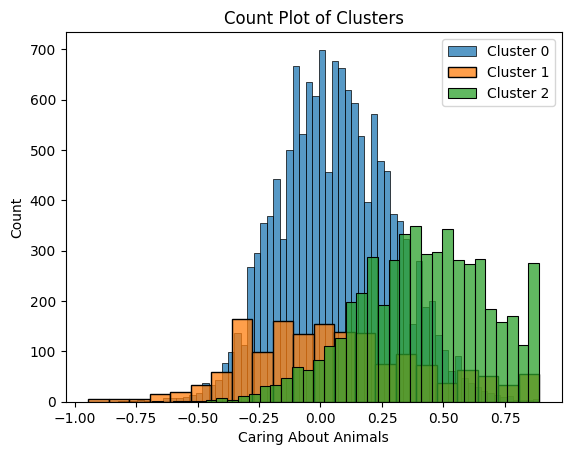

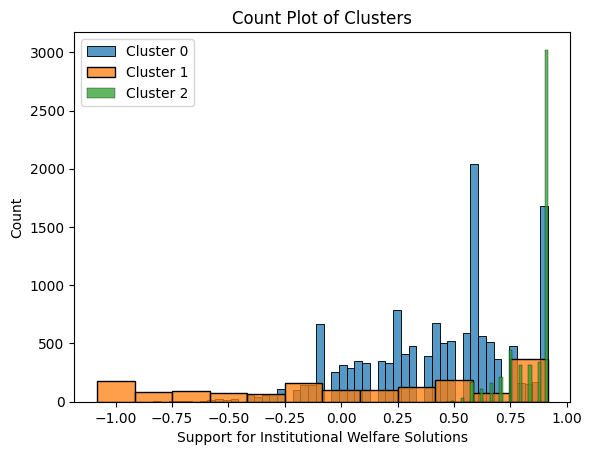

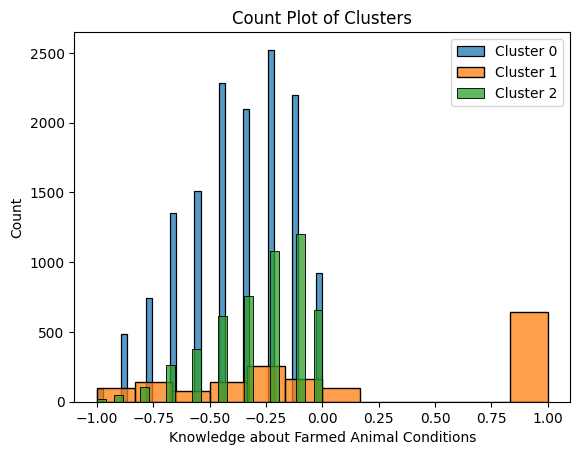

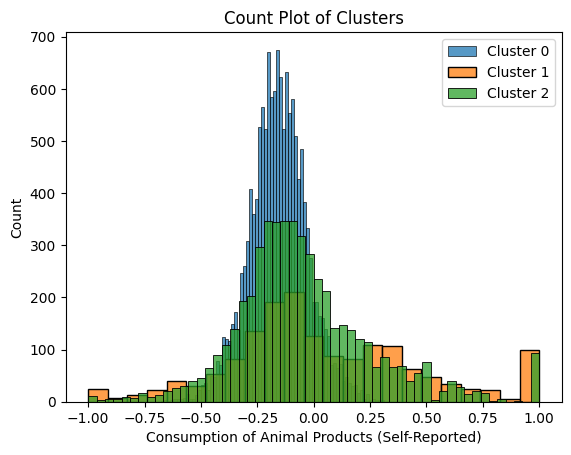

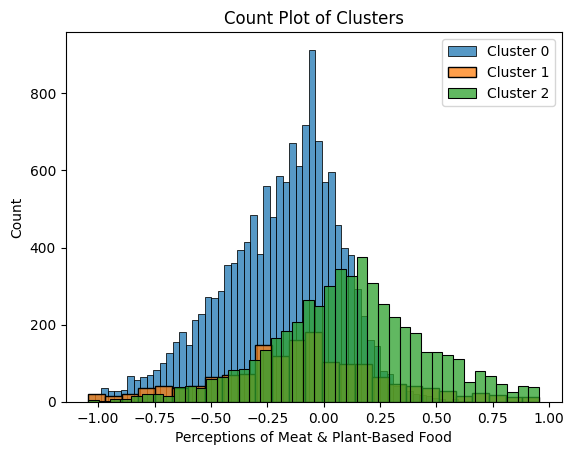

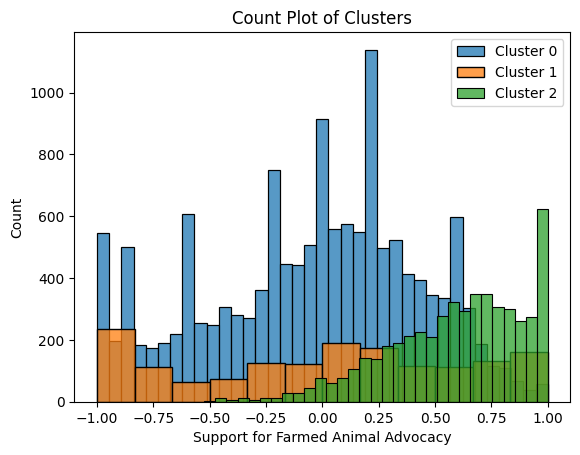

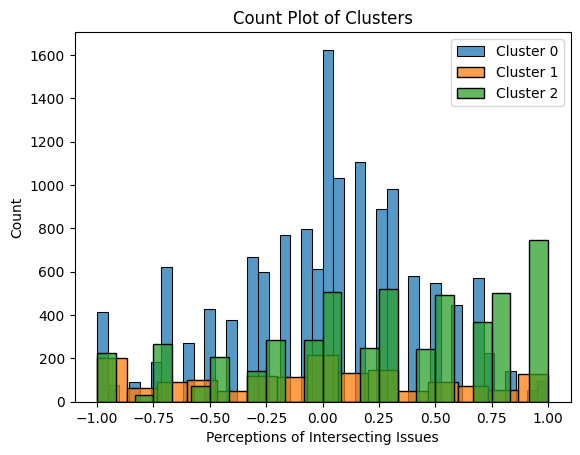

In [81]:

for i in cat_columns_reorder:
    # Plotting
    plt.figure()

    # Iterate over unique clusters
    clusters = df['cluster'].unique()
    for cluster in clusters:
        cluster_data = df[df['cluster'] == cluster]
        sns.histplot(data=cluster_data[i], label=f'Cluster {cluster}', kde=False)

    # Add labels and title
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('Count Plot of Clusters')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


656/656 [==============================] - 0s 282us/step


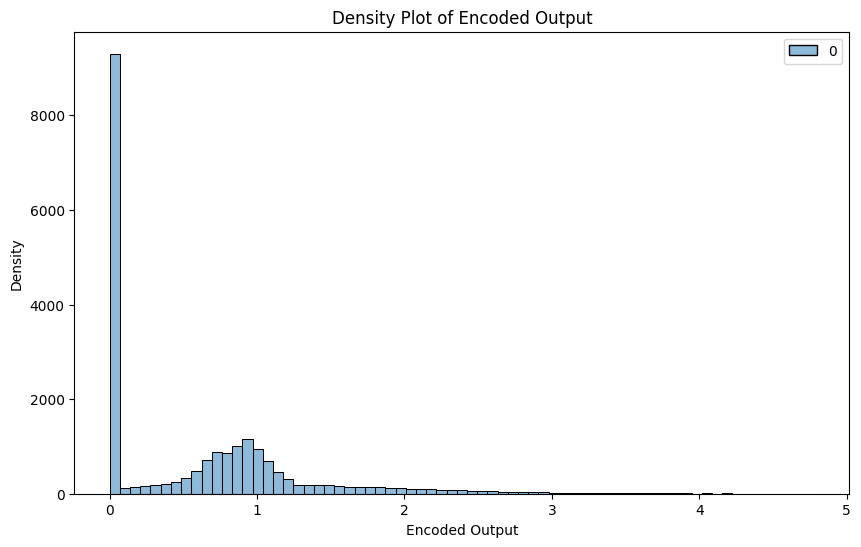

In [89]:
# Assuming your dataset is in the same order as the encoder inputs
encoder_inputs = df[cat_columns_reorder]  # Adjust this if necessary

# Get the encoded output
encoded_output = encoder.predict(encoder_inputs)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the density of the encoded output
sns.histplot(data=encoded_output, fill=True)

# Add labels and title
plt.xlabel('Encoded Output')
plt.ylabel('Density')
plt.title('Density Plot of Encoded Output')

# Show the plot
plt.show()